In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
import statistics as sta

# Preguntas que resolver 
- ¿Cuál es la tasa de match entre talentos y empresas? ¿Cómo podría mejorarse?
- ¿Cuáles son las principales características que los talentos buscan en las empresas?
- ¿Cómo podría TalentPitch hacer que estas características sean más visibles?
- ¿Qué tipos de datos adicionales podrían recopilarse para mejorar la precisión del
algoritmo de match?

# Lectura del documento
****

In [2]:
dt_compani = pd.read_csv('t_companies.csv')
dt_user = pd.read_csv('t_users.csv')
dt_calls = pd.read_csv('t_open_calls.csv')

## Determinar datos nulos presentes en los dataset

In [3]:
def Null_analisis(dataset):
    ax= sns.barplot(x=dataset.isnull().sum()/len(dataset),y=dataset.columns)
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(5, 0), textcoords='offset points')

    plt.title('Datos faltantes en procentajes')
    plt.xlabel(f'cant. datos faltantes perentes en un total de {len(dataset)}')
    plt.ylabel('Columnas')
    print(dataset.info())
    plt.show()



Analisis de compani

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   description                      213 non-null    object
 1   thematic_areas                   14 non-null     object
 2   features_culture_organization    18 non-null     object
 3   digital_tools                    72 non-null     object
 4   work_methods                     71 non-null     object
 5   outstanding_knowledge_community  71 non-null     object
 6   soft_skills                      71 non-null     object
 7   key                              213 non-null    object
dtypes: object(8)
memory usage: 13.4+ KB
None


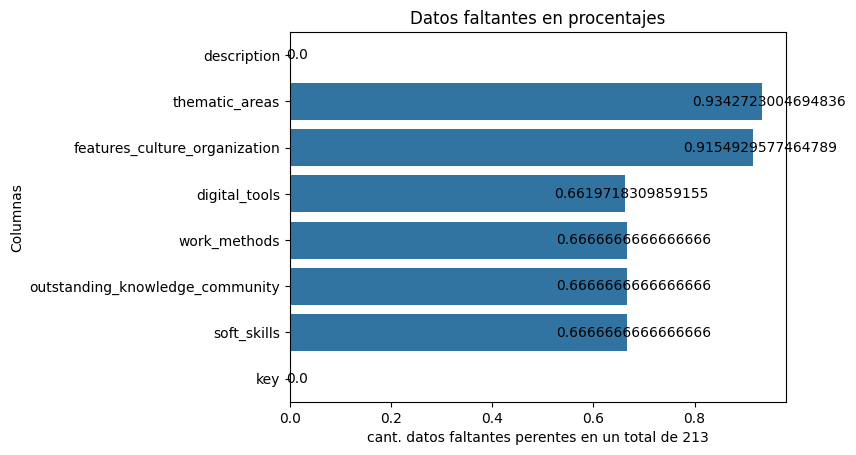

In [4]:
Null_analisis(dt_compani)

El archivo `t_companies.csv` comprende el contenido relacionado sobre las distintas compañias, en ellas encontramos contenido como:
 1. `description`: Descripcion y nombre de la empresa de interes  (_string_)
 1. `thematic_areas`: Comprende en una lista de identificadores de areas de interes (_list_)
 1. `freatures_culture_organization`: Lista de contenido relacionado a la cultura de la empresa (_list_)
 1. `digital_tools`: Lista de metodologias aplicada en la empresa(_list_)
 1. `work_methods`: Lista que comprende la tipologia de trabajo de la empresa(_list_)
 1. `outstanding_knowledge_community`: Lista que comprende las areas de desarrollo que busca la empresa (_list_)
 1. `soft_skills`:Lista que refiere a las habilidades que busca la empresa en sus candidatos (_list_)
 1. `key`: Palabra que describe el enfoque o rama de despliegue de la empresa (_string_)

Analisis de convocatorias

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   1000 non-null   object 
 1   thematic_area_id       1000 non-null   int64  
 2   thematic_area          1000 non-null   object 
 3   interest_area_id       0 non-null      float64
 4   description            732 non-null    object 
 5   requirements           610 non-null    object 
 6   work_methods           454 non-null    object 
 7   optional_requirements  54 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB
None


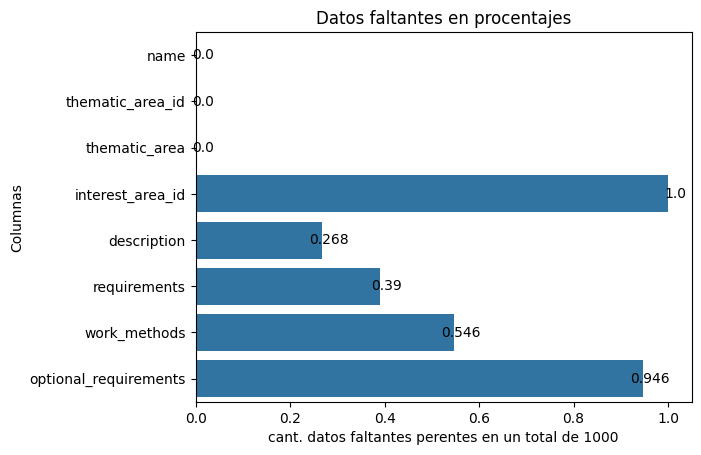

In [5]:
Null_analisis(dt_calls)

En el archivo de `t_open_calls.csv` entonramos todo informacion relacionado a las distitnas convocatorias:

1. `name`: Es el nombre o el título de la convocatoria, que resume el problema o el desafío que se quiere resolver. Es un dato de tipo string (_string_).
1. `thematic_area_id`: Es el identificador numérico del área temática a la que pertenece la convocatoria, según una clasificación predefinida. Es un dato de tipo int (_int_).
1. `thematic_area`: Es el nombre del área temática a la que pertenece la convocatoria, según una clasificación predefinida. Es un dato de tipo string (_string_).
1. `interest_area_id`: Es el identificador numérico del área de interés a la que pertenece la convocatoria, según una clasificación predefinida. Es un dato de tipo int (_int_) 
1. `description`: Es una descripción detallada de la convocatoria, donde se explica el contexto, el objetivo, el alcance y los resultados esperados. Es un dato de tipo string (_string_) 
1. `requirements`: Es la lista de requisitos o condiciones que deben cumplir los talentos que quieran participar en la convocatoria. Es un dato de tipo list (_list_) 
1. `work_methods`: Es la lista de métodos o herramientas de trabajo que se utilizarán para desarrollar la solución a la convocatoria. Es un dato de tipo list (_list_) 
1. `optional_requirements`: Es la lista de requisitos o condiciones opcionales que pueden tener los talentos que quieran participar en la convocatoria. Es un dato de tipo list (_list_) 


Analisis de datos de talent

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                1000 non-null   int64 
 1   about                  550 non-null    object
 2   position               708 non-null    object
 3   career                 897 non-null    object
 4   updated_at             1000 non-null   object
 5   facebook               182 non-null    object
 6   instagram              149 non-null    object
 7   linkedin               341 non-null    object
 8   website                156 non-null    object
 9   want_arrive            152 non-null    object
 10  want_to_be             956 non-null    object
 11  want_to_work           617 non-null    object
 12  my_languages           819 non-null    object
 13  desired_role           237 non-null    object
 14  my_personality         17 non-null     object
 15  benefits_in_companies 

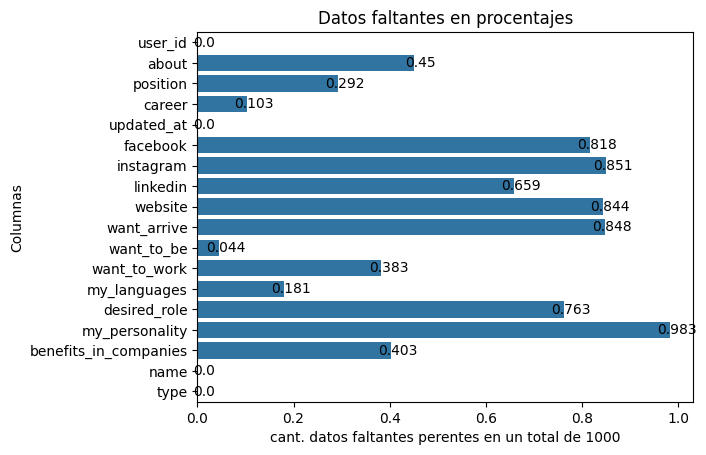

In [6]:
Null_analisis(dt_user)

El archivo de `t_users.csv` comprende todos los datos relacionados a los talentos o usuariso presentes en TalentPitch, en ellos encontramos la siguiente informacion: 

1. `user_id`: Es el identificador único de cada talento. Es un dato de tipo int (_int_).
about: Es una breve descripción personal de cada talento, donde se resaltan sus habilidades, competencias y objetivos. Es un dato de tipo string (_string_).
1. `position`: Es el cargo o rol que cada talento ocupa o desea ocupar en una empresa. Es un dato de tipo string (_string_).
1. `career`: Es la carrera profesional o el campo de estudio de cada talento. Es un dato de tipo string (_string_).
1. `updated_at`: Es la fecha y hora en que cada talento actualizó su perfil en la plataforma TalentPitch. Es un dato de tipo datetime (_date_).
1. `facebook`: Es el enlace al perfil de Facebook de cada talento, si lo tiene. Es un dato de tipo string (_string_) 
1. `instagram`: Es el enlace al perfil de Instagram de cada talento, si lo tiene. Es un dato de tipo string (_string_) 
1. `linkedin`: Es el enlace al perfil de LinkedIn de cada talento, si lo tiene. Es un dato de tipo string (_string_) 
1. `website`: Es el enlace al sitio web personal o profesional de cada talento, si lo tiene. Es un dato de tipo string (_string_) 
1. `want_arrive`: Es la meta o el sueño que cada talento quiere alcanzar en su vida profesional. Es un dato de tipo string (_string_).
1. `want_to_be`: Es el tipo de profesional o emprendedor que cada talento quiere ser. Es un dato de tipo string (_string_).
1. `want_to_work`: Es la lista de empresas o sectores en los que cada talento quiere trabajar. Es un dato de tipo list (_list_).
1. `my_languages`: Es la lista de idiomas que cada talento habla o domina. Es un dato de tipo list (_list_) 
1. `desired_role`: Es el rol o la función que cada talento desea desempeñar en una empresa. Es un dato de tipo string (_string_) 
1. `my_personality`: Es la personalidad o el estilo de trabajo de cada talento. Es un dato de tipo string (_string_) 
1. `benefits_in_companies`: Es la lista de beneficios o incentivos que cada talento valora o busca en una empresa. Es un dato de tipo list (_list_) 
1. `name`: Es el nombre o el alias de cada talento. Es un dato de tipo string (_dict_)
1. `type`: Es el tipo de entidad a la que pertenece cada talento. Es un dato de tipo string (_string_).


## Eliminacion de columnas cuyos datos faltantes superen el `80%` de los datos

In [7]:


def Descicion_columnas(dataset):
    porcentaje_null = dict(dataset.isnull().sum()/len(dataset))
    drop_col = []

    for col in porcentaje_null.keys():
        if porcentaje_null[col] >= 0.8:
            drop_col +=[col]

    #eliminacion de columna
    dataset=dataset.drop(drop_col,axis=1)

    return dataset
        
    
        
        

In [8]:
dt_compani=Descicion_columnas(dt_compani)
dt_calls=Descicion_columnas(dt_calls)
dt_user=Descicion_columnas(dt_user)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   description                      213 non-null    object
 1   digital_tools                    72 non-null     object
 2   work_methods                     71 non-null     object
 3   outstanding_knowledge_community  71 non-null     object
 4   soft_skills                      71 non-null     object
 5   key                              213 non-null    object
dtypes: object(6)
memory usage: 10.1+ KB
None


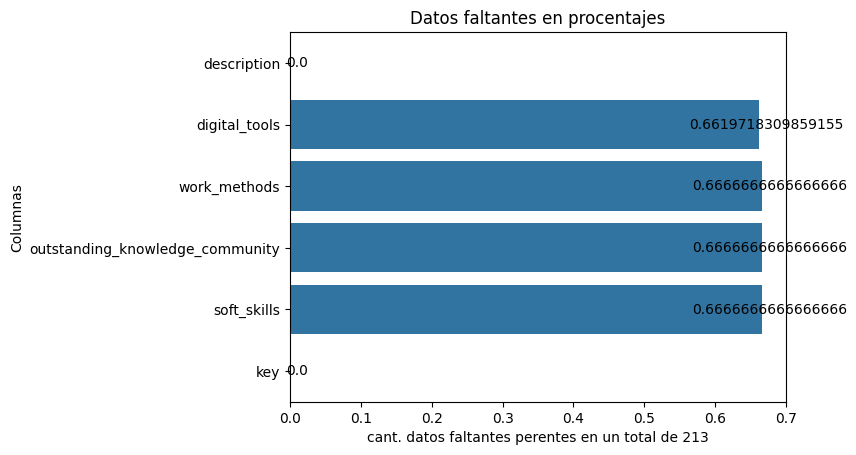

In [9]:
Null_analisis(dt_compani)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                1000 non-null   int64 
 1   about                  550 non-null    object
 2   position               708 non-null    object
 3   career                 897 non-null    object
 4   updated_at             1000 non-null   object
 5   linkedin               341 non-null    object
 6   want_to_be             956 non-null    object
 7   want_to_work           617 non-null    object
 8   my_languages           819 non-null    object
 9   desired_role           237 non-null    object
 10  benefits_in_companies  597 non-null    object
 11  name                   1000 non-null   object
 12  type                   1000 non-null   object
dtypes: int64(1), object(12)
memory usage: 101.7+ KB
None


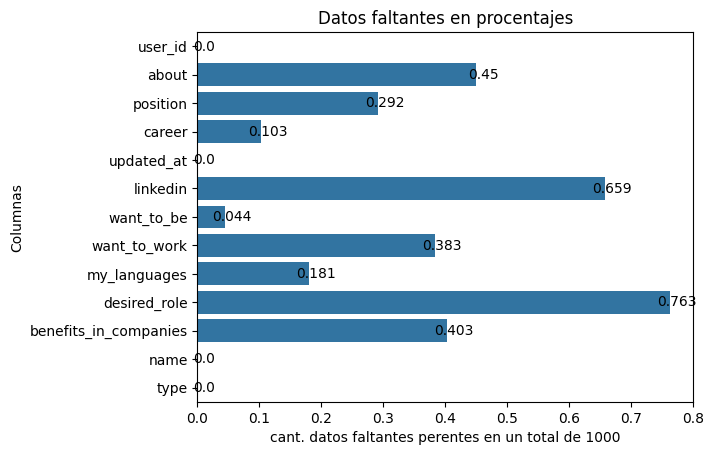

In [10]:
Null_analisis(dt_user)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              1000 non-null   object
 1   thematic_area_id  1000 non-null   int64 
 2   thematic_area     1000 non-null   object
 3   description       732 non-null    object
 4   requirements      610 non-null    object
 5   work_methods      454 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB
None


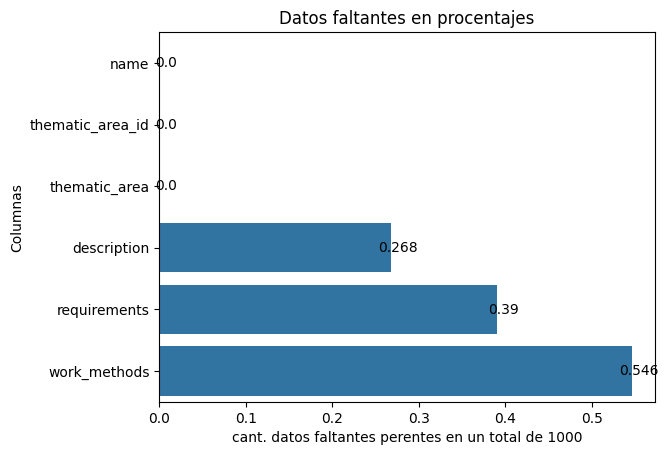

In [11]:
Null_analisis(dt_calls)

## Eliminar filas repetidas
***

In [12]:
def Duplicates(dataset):
    print(f"Total de las filas :{len(dataset)}")
    dataset.drop_duplicates(inplace=True)
    print(f"Total de las filas posterior a los duplicados :{len(dataset)}")


In [13]:
Duplicates(dt_calls)

Total de las filas :1000
Total de las filas posterior a los duplicados :806


In [14]:
Duplicates(dt_compani)

Total de las filas :213
Total de las filas posterior a los duplicados :204


In [15]:
Duplicates(dt_user)

Total de las filas :1000
Total de las filas posterior a los duplicados :1000


## Eliminar tablas irrelevantes y creacion de nuevas tablas
***

### Eliminar columnas irrelevantes para el dataset de dt_compani
***

In [16]:
dt_compani.head()

,description,digital_tools,work_methods,outstanding_knowledge_community,soft_skills,key
0,"Autodesk is a design, engineering, and constru...","[""AutoCAD"", ""Revit"", ""Inventor"", ""Maya"", ""Clou...","[""remote"", ""in_house"", ""mixed""]","[""technology"", ""accounting"", ""customer_service""]","[""problem_solving"", ""teamwork"", ""innovation"", ...",technology
1,Somos una compañía que agrupa soluciones en se...,[],NaN,NaN,NaN,services
2,Every company has a mission. What's ours? To e...,"[""Microsoft Azure"", ""Microsoft 365"", ""Windows""...","[""remote"", ""in_house"", ""mixed""]","[""marketing_sales"", ""technology"", ""work_method...","[""assertive_communication"", ""teamwork"", ""probl...",technology
3,General Medica de Colombia SA,NaN,NaN,NaN,NaN,health
4,McDonalds is an American fast food restaurant ...,"[""Webex"", ""SharePoint"", ""Microsoft Dynamics"", ...","[""remote"", ""in_house"", ""mixed""]","[""customer_service"", ""marketing_sales"", ""proce...","[""assertive_communication"", ""teamwork"", ""probl...",food_and_beverages


In [17]:
dt_compani=dt_compani.drop(['description'],axis=1)

### Eliminacion de columnas irrelevantes en el dataset de dt_call
****

In [18]:
dt_calls.head()

,name,thematic_area_id,thematic_area,description,requirements,work_methods
0,¿Cómo podríamos crear una estrategia para que ...,19,sales,NaN,NaN,"[""to_be_agreed""]"
1,Analista marketplace,11,market,IMPORTANTE EMPRESA DEL SECTOR TEXTIL REQUIERE ...,"[""recursos"", ""experiencia"", ""recursos humanos""]",NaN
2,Asistente Administrativo y Marketing,17,consumer,ASISTENTE ADMINISTRATIVO Y DE MARKETINGDescrip...,"[""planes"", ""cultura"", ""digital"", ""redes social...",NaN
3,atención al cliente - personas sin experienci...,17,consumer,Únete a nuestra campaña de atencion al clien...,"[""experiencia"", ""atencion al cliente"", ""transp...",NaN
4,auxiliar administrativo/a / Contabilidad,16,finance,Empresa multinacional de alimentos está en la...,"[""administrativo"", ""alimentos"", ""manejo"", ""exp...",NaN


In [19]:
def Extraer_salarios(cadena):
    numeros = [x for x in range(0,10)]
    numeros_res=[]
    abc = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

    for c in cadena:
        for n in numeros:
            if c.__contains__(str(n)) and len(c) > 9 and not numeros_res.__contains__(c):
                    numeros_res +=[str(c).lower()]
    if len(numeros_res) == 0:
        numeros_res +=[' no hay salario']


    return numeros_res

In [20]:
salari=dt_calls['description']
salario=[]
for text in salari:
    if type(text) == str:
        try:
            list_text = text.split(' ')
            salario+=[Extraer_salarios(list_text)]
        except:pass

In [21]:
dt_calls=dt_calls.drop('description',axis=1)

### Eliminacion de columnas irrelevantes en el dataset de user
***

In [22]:
dt_user.head()

,user_id,about,position,career,updated_at,linkedin,want_to_be,want_to_work,my_languages,desired_role,benefits_in_companies,name,type
0,34491,"Soy una Persona analítica, objetiva, con excel...",NaN,Derecho,2023-09-01 12:10:20,NaN,entrepreneur,"[""https://www.segurossura.com.co/paginas/defau...",NaN,NaN,"[""bonuses"", ""study_opportunities"", ""flexible_s...","{""es"": ""Politica""}",my_knowledge
1,170899,NaN,Psicóloga,Maestria en MACC,2023-09-01 13:21:24,NaN,first_job,NaN,"[[""EN"", ""intermediate"", null]]",NaN,"[""formation""]","{""es"": ""Javascript""}",digital_tools
2,56307,NaN,NaN,NaN,2023-09-01 12:40:14,NaN,employment,NaN,NaN,NaN,NaN,"{""es"": ""procesos""}",my_knowledge
3,1968597,NaN,Auxiliar administrativa- Costos,Contaduría,2023-09-19 07:59:45,NaN,employment,"[""Talentpitch""]","[[""ES"", ""advanced"", null]]",CONTABILIDAD,"[""flexible_schedules"", ""laboral_training"", ""fo...","{""es"": ""Contabilidad""}",my_knowledge
4,1958883,NaN,Desempleado,NaN,2023-09-01 13:26:44,NaN,employment,NaN,"[[""EN"", ""intermediate""]]",NaN,NaN,"{""es"": ""Iso""}",my_knowledge


#### Transformacion de laguages Languages
****
Como pudimos evidenciar la columna de `my_languages` no fue correctamenta modificada por las funciones, es por ello que antes de finalizar lo amodificaremos, cambiando de listas a cadenas de texto y eliminanod cualuier dato nulo que encontremos

In [23]:
dt_user['my_languages'].isnull().sum()

181

In [24]:
languages =[]
dt_user['my_languages'].replace(np.nan,'null',inplace=True)
for x in dt_user['my_languages']:
    dato = x.replace('null',f"[['not','basic']]")
    lista=[]
    for y in range(0,3):
        try:
            lista +=[eval(dato)[y]]
        except:
            lista +=[['not','basic']]
        

    languages +=[lista]


In [25]:
languages[0]

[['not', 'basic'], ['not', 'basic'], ['not', 'basic']]

In [26]:
dt_user = dt_user.drop(['my_languages'],axis=1)

dt_user['my_languages_'] = [ x[0][0]for x in languages]
dt_user['level_languages_'] = [ x[0][1]for x in languages]
dt_user['my_languages_1'] = [ x[1][0]for x in languages]
dt_user['level_languages_1'] = [ x[1][1]for x in languages]
dt_user['my_languages_2'] = [ x[2][0]for x in languages]
dt_user['level_languages_2'] = [ x[2][1]for x in languages]


In [27]:
dt_user.head(1)

,user_id,about,position,career,updated_at,linkedin,want_to_be,want_to_work,desired_role,benefits_in_companies,name,type,my_languages_,level_languages_,my_languages_1,level_languages_1,my_languages_2,level_languages_2
0,34491,"Soy una Persona analítica, objetiva, con excel...",NaN,Derecho,2023-09-01 12:10:20,NaN,entrepreneur,"[""https://www.segurossura.com.co/paginas/defau...",NaN,"[""bonuses"", ""study_opportunities"", ""flexible_s...","{""es"": ""Politica""}",my_knowledge,not,basic,not,basic,not,basic


### Transformacion de la columna `name`

In [28]:
dt_user['name']=dt_user['name'].dropna().apply(lambda x : str(list(eval(x).values())[0]).lower()) 

**Observacion**

Dado las preguntas plantilla evidencio que el saber el usuario de linkdin no representara mayor informacion mas que curiosidad

In [29]:
dt_user=dt_user.drop(['linkedin','about','want_to_work'],axis=1)

### Transformacion de datos del tipo lista a texto
***

In [30]:
def min_func(dato,index):
    lista = eval(dato)
    try:
        return lista[index]
    except:
        return np.nan

def Create_columns(dataset):
    #transformar los nan en una vraiable aleatoria
    dataset.replace('[]','["a"]',inplace=True)
    dataset.replace(np.nan,'["a"]',inplace=True)


    columns = dataset.columns
    for col in columns:
        try:
            rango=round(dataset[col].apply(lambda x: len(eval(x))).std())
            #create new columns
            dataset['help'] = dataset[col]
            dataset[col] = dataset['help'].apply(lambda x: min_func(x,0))

            for index in range(rango):
                dataset[col+"_"+str(index+1)] = dataset['help'].apply(lambda x: min_func(x,index+1))
            dataset = dataset.drop(['help'],axis=1)          
        except:pass
    
    dataset.replace('a',np.nan,inplace=True)
    dataset.replace('["a"]',np.nan,inplace=True)


    return dataset

<class 'pandas.core.frame.DataFrame'>
Index: 806 entries, 0 to 998
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              806 non-null    object
 1   thematic_area_id  806 non-null    int64 
 2   thematic_area     806 non-null    object
 3   requirements      596 non-null    object
 4   work_methods      273 non-null    object
 5   requirements_1    581 non-null    object
 6   requirements_2    559 non-null    object
 7   requirements_3    521 non-null    object
 8   requirements_4    467 non-null    object
dtypes: int64(1), object(8)
memory usage: 63.0+ KB
None


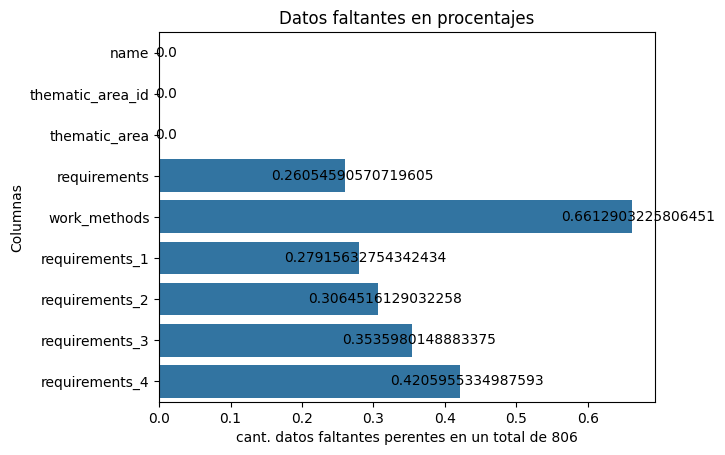

In [31]:
dt_calls=Create_columns(dt_calls)
Null_analisis(dt_calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  1000 non-null   int64 
 1   position                 708 non-null    object
 2   career                   897 non-null    object
 3   updated_at               1000 non-null   object
 4   want_to_be               956 non-null    object
 5   desired_role             237 non-null    object
 6   benefits_in_companies    580 non-null    object
 7   name                     1000 non-null   object
 8   type                     1000 non-null   object
 9   my_languages_            1000 non-null   object
 10  level_languages_         1000 non-null   object
 11  my_languages_1           1000 non-null   object
 12  level_languages_1        1000 non-null   object
 13  my_languages_2           1000 non-null   object
 14  level_languages_2        1000 non-null   

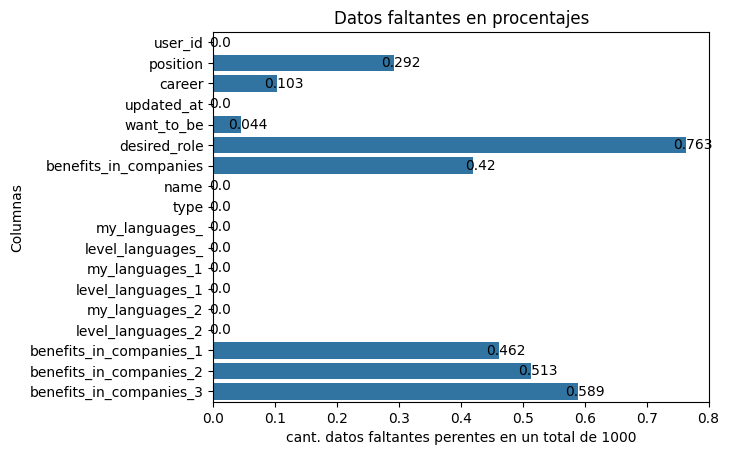

In [32]:
dt_user=Create_columns(dt_user)
Null_analisis(dt_user)

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 212
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   digital_tools                      62 non-null     object
 1   work_methods                       63 non-null     object
 2   outstanding_knowledge_community    60 non-null     object
 3   soft_skills                        61 non-null     object
 4   key                                204 non-null    object
 5   digital_tools_1                    61 non-null     object
 6   digital_tools_2                    60 non-null     object
 7   digital_tools_3                    54 non-null     object
 8   work_methods_1                     60 non-null     object
 9   outstanding_knowledge_community_1  59 non-null     object
 10  soft_skills_1                      61 non-null     object
 11  soft_skills_2                      59 non-null     object
dtypes: object(12)

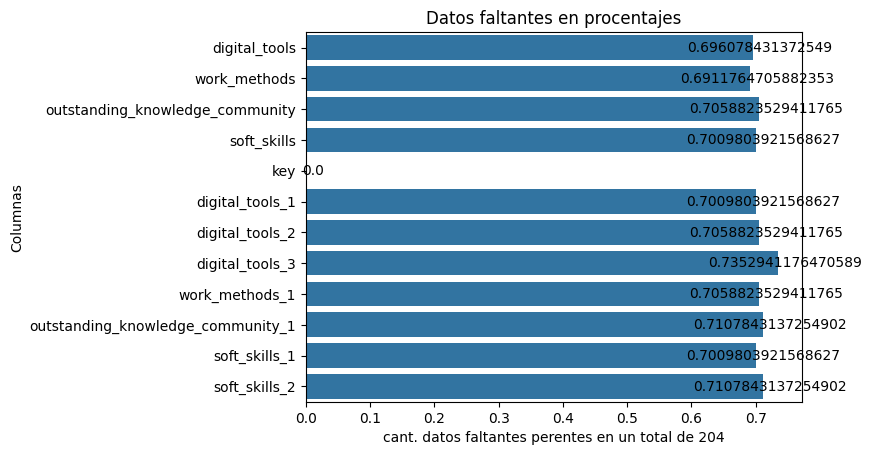

In [33]:
dt_compani=Create_columns(dt_compani)
Null_analisis(dt_compani)

In [34]:
dt_user.head()

,user_id,position,career,updated_at,want_to_be,desired_role,benefits_in_companies,name,type,my_languages_,level_languages_,my_languages_1,level_languages_1,my_languages_2,level_languages_2,benefits_in_companies_1,benefits_in_companies_2,benefits_in_companies_3
0,34491,NaN,Derecho,2023-09-01 12:10:20,entrepreneur,NaN,bonuses,politica,my_knowledge,not,basic,not,basic,not,basic,study_opportunities,flexible_schedules,NaN
1,170899,Psicóloga,Maestria en MACC,2023-09-01 13:21:24,first_job,NaN,formation,javascript,digital_tools,EN,intermediate,not,basic,not,basic,NaN,NaN,NaN
2,56307,NaN,NaN,2023-09-01 12:40:14,employment,NaN,NaN,procesos,my_knowledge,not,basic,not,basic,not,basic,NaN,NaN,NaN
3,1968597,Auxiliar administrativa- Costos,Contaduría,2023-09-19 07:59:45,employment,CONTABILIDAD,flexible_schedules,contabilidad,my_knowledge,ES,advanced,not,basic,not,basic,laboral_training,formation,bonuses
4,1958883,Desempleado,NaN,2023-09-01 13:26:44,employment,NaN,NaN,iso,my_knowledge,EN,intermediate,not,basic,not,basic,NaN,NaN,NaN


### Creacion de diccionario para transfromacion de datos
***

In [35]:
#funcion de variabilidad
Var = lambda X,m: sum([(x-m)**2 for x in X])/len(X)

In [36]:
def Read_list_table(dataset,colum):
    
    #Replace the null with 'a'
    dataset[colum].replace(np.nan,'["a"]',inplace=True)
    dataset[colum].replace('[]','["a"]',inplace=True)
    #The list Case
    try:
    #Eliminate the duplicates and enumerate
        content=[l.lower()  for x in dataset[colum].unique() for l in eval(x)]
        unique = list(enumerate(set(content),1))
        unique_dt = dict([x,y] for y,x in unique)
        unique = dict([x,y/100] for y,x in unique)
        data_analys=[unique[l.lower()]  for x in dataset[colum] for l in eval(x)]

        #create the dataframe


    #the string Case
    except:
        content=[x.lower()  for x in dataset[colum].unique()]
        unique = list(enumerate(set(content),1))
        unique_dt = dict([x,y] for y,x in unique)
        unique = dict([x,y/100] for y,x in unique)
        data_analys=[unique[x.lower()]  for x in dataset[colum]]
        
    # if example == None:
#     try:
# #         #Delete de null option
#         unique_dt.pop('["a"]')
#         unique_dt.setdefault('["a"]',0)
#     except:pass

    #mean
    mode=sta.mode(data_analys)
    #Varianza
    result=Var(data_analys,mode)
    return result,unique_dt
    
    
    
    
    

In [37]:
dt_compani.isnull().sum()

digital_tools                        142
work_methods                         141
outstanding_knowledge_community      144
soft_skills                          143
key                                    0
digital_tools_1                      143
digital_tools_2                      144
digital_tools_3                      150
work_methods_1                       144
outstanding_knowledge_community_1    145
soft_skills_1                        143
soft_skills_2                        145
dtype: int64

In [38]:
def Lector_null(dataset,exception=[]):
    nulos = dict(dataset.isnull().sum()/len(dataset))
    dicts = dict()
    for key,value in nulos.items(): 
        if value > 0.0:
            varianza,dicc=Read_list_table(dataset,key)
            if not  exception.__contains__(key):
                dicts.setdefault(key,dicc)
    return dicts
    

In [39]:
dict_calls=Lector_null(dt_calls,['description'])
dict_compani=Lector_null(dt_compani)
dict_user=Lector_null(dt_user,['about'])

In [40]:
dict_user.keys()

dict_keys(['position', 'career', 'want_to_be', 'desired_role', 'benefits_in_companies', 'benefits_in_companies_1', 'benefits_in_companies_2', 'benefits_in_companies_3'])

**Casos especiales** 

In [41]:
dict_compani.setdefault('key',Read_list_table(dt_compani,'key')[-1])

#user
dict_user.setdefault('type',Read_list_table(dt_user,'type')[-1])
dict_user.setdefault('name',Read_list_table(dt_user,'name')[-1])
dict_user.setdefault('want_to_be',Read_list_table(dt_user,'want_to_be')[-1])



{'freelancer': 1,
 'employment': 2,
 'entrepreneur': 3,
 '["a"]': 4,
 'practice': 5,
 'first_job': 6}

**Replace de "a" to nan**


In [42]:
dt_calls.replace('["a"]',np.nan,inplace=True)
dt_compani.replace('["a"]',np.nan,inplace=True)
dt_user.replace('["a"]',np.nan,inplace=True)

### Traduccion de los datos de texto a int
***

In [43]:
def Translate(dataset,mega_dict):
    columnas = list(mega_dict.keys())

    for col in columnas:
            dataset[col].replace(np.nan,'none',inplace=True)
            
            mega_dict[col].setdefault('none',9999)
            dataset[col]=dataset[col].apply(lambda x: mega_dict[col][str(x).lower()])
            
    dataset.replace(9999,None,inplace=True)

    return dataset


In [44]:
Translate(dt_compani,dict_compani)
Translate(dt_calls,dict_calls)
Translate(dt_user,dict_user)

,user_id,position,career,updated_at,want_to_be,desired_role,benefits_in_companies,name,type,my_languages_,level_languages_,my_languages_1,level_languages_1,my_languages_2,level_languages_2,benefits_in_companies_1,benefits_in_companies_2,benefits_in_companies_3
0,34491,336,109,2023-09-01 12:10:20,3,None,15,328,2,not,basic,not,basic,not,basic,14,17,None
1,170899,7,138,2023-09-01 13:21:24,6,None,4,235,1,EN,intermediate,not,basic,not,basic,None,None,None
2,56307,336,None,2023-09-01 12:40:14,2,None,None,335,2,not,basic,not,basic,not,basic,None,None,None
3,1968597,128,94,2023-09-19 07:59:45,2,14,17,89,2,ES,advanced,not,basic,not,basic,2,4,14
4,1958883,101,None,2023-09-01 13:26:44,2,None,None,147,2,EN,intermediate,not,basic,not,basic,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33808,336,341,2023-09-01 12:09:57,3,None,13,102,1,not,basic,not,basic,not,basic,None,None,None
996,161267,338,354,2023-09-01 13:20:19,2,None,None,270,2,EN,advanced,ES,advanced,not,basic,None,None,None
997,1958419,305,518,2023-09-01 13:26:17,2,None,None,214,2,EN,basic,not,basic,not,basic,None,None,None
998,44086,246,171,2023-09-01 12:29:19,1,None,1,153,2,EN,intermediate,not,basic,not,basic,None,None,None


### Reconstruccion de datos faltantes
***

In [45]:
dt_calls_no_null = dt_calls.dropna()
dt_calls_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 45 to 828
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              28 non-null     object
 1   thematic_area_id  28 non-null     int64 
 2   thematic_area     28 non-null     object
 3   requirements      28 non-null     object
 4   work_methods      28 non-null     object
 5   requirements_1    28 non-null     object
 6   requirements_2    28 non-null     object
 7   requirements_3    28 non-null     object
 8   requirements_4    28 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.2+ KB


In [46]:
dt_compani_no_null = dt_compani.dropna()
dt_compani_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 212
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   digital_tools                      50 non-null     object
 1   work_methods                       50 non-null     object
 2   outstanding_knowledge_community    50 non-null     object
 3   soft_skills                        50 non-null     object
 4   key                                50 non-null     int64 
 5   digital_tools_1                    50 non-null     object
 6   digital_tools_2                    50 non-null     object
 7   digital_tools_3                    50 non-null     object
 8   work_methods_1                     50 non-null     object
 9   outstanding_knowledge_community_1  50 non-null     object
 10  soft_skills_1                      50 non-null     object
 11  soft_skills_2                      50 non-null     object
dtypes: int64(1), o

In [47]:
dt_user_no_null = dt_user.dropna()
dt_user_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 3 to 988
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  55 non-null     int64 
 1   position                 55 non-null     int64 
 2   career                   55 non-null     object
 3   updated_at               55 non-null     object
 4   want_to_be               55 non-null     object
 5   desired_role             55 non-null     object
 6   benefits_in_companies    55 non-null     object
 7   name                     55 non-null     int64 
 8   type                     55 non-null     int64 
 9   my_languages_            55 non-null     object
 10  level_languages_         55 non-null     object
 11  my_languages_1           55 non-null     object
 12  level_languages_1        55 non-null     object
 13  my_languages_2           55 non-null     object
 14  level_languages_2        55 non-null     object


#### Funcion para prediccion de datos faltantes
****

In [48]:
def Prediccion_nulos(dataset,dataset_not_null,columnas = []):
    dataset = dataset[columnas]
    dataset_not_null = dataset_not_null[columnas]
    
    knn_data = KNNImputer(n_neighbors=len(columnas))
    # knn_data = KNNImputer(n_neighbors=3)

    knn_data.fit(np.array(dataset_not_null))

    result = knn_data.transform(np.array(dataset))
    print(f"shape del dataset: {dataset.shape}")
    print(f"shape del resultado: {result.shape}")
    
    for x in range(len(result)):
        dataset.iloc[x] = result[x]

    
    return dataset



In [49]:
dt_compani=Prediccion_nulos(dt_compani,dt_compani_no_null,dt_compani.columns)

shape del dataset: (204, 12)
shape del resultado: (204, 12)


In [50]:
def Extract_int_columns(dataset):
    for x in dataset.columns:
        try:
            dataset[x] = dataset[x].astype(int)
        except:pass
        
    type_data=dict(dataset.dtypes)
    resultados = [clave for clave, valor in type_data.items() if valor == 'int32']
    return resultados

In [51]:
dt_user[Extract_int_columns(dt_user_no_null)]=Prediccion_nulos(dt_user,dt_user_no_null,Extract_int_columns(dt_user_no_null))

shape del dataset: (1000, 11)
shape del resultado: (1000, 11)


C:\Users\Carlos\AppData\Local\Temp\ipykernel_14788\439592519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[x] = dataset[x].astype(int)
C:\Users\Carlos\AppData\Local\Temp\ipykernel_14788\439592519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[x] = dataset[x].astype(int)
C:\Users\Carlos\AppData\Local\Temp\ipykernel_14788\439592519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [52]:
dt_user.isnull().sum()

user_id                    0
position                   0
career                     0
updated_at                 0
want_to_be                 0
desired_role               0
benefits_in_companies      0
name                       0
type                       0
my_languages_              0
level_languages_           0
my_languages_1             0
level_languages_1          0
my_languages_2             0
level_languages_2          0
benefits_in_companies_1    0
benefits_in_companies_2    0
benefits_in_companies_3    0
dtype: int64

In [53]:
dt_calls[Extract_int_columns(dt_calls_no_null)]=Prediccion_nulos(dt_calls,dt_calls_no_null,Extract_int_columns(dt_calls_no_null))

C:\Users\Carlos\AppData\Local\Temp\ipykernel_14788\439592519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[x] = dataset[x].astype(int)
C:\Users\Carlos\AppData\Local\Temp\ipykernel_14788\439592519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[x] = dataset[x].astype(int)
C:\Users\Carlos\AppData\Local\Temp\ipykernel_14788\439592519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

shape del dataset: (806, 7)
shape del resultado: (806, 7)


C:\Users\Carlos\AppData\Local\Temp\ipykernel_14788\439592519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[x] = dataset[x].astype(int)
C:\Users\Carlos\AppData\Local\Temp\ipykernel_14788\439592519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[x] = dataset[x].astype(int)
C:\Users\Carlos\AppData\Local\Temp\ipykernel_14788\439592519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [54]:
dt_calls.isnull().sum()

name                0
thematic_area_id    0
thematic_area       0
requirements        0
work_methods        0
requirements_1      0
requirements_2      0
requirements_3      0
requirements_4      0
dtype: int64

### Traduccion de datos de int a string


In [55]:
def Translate_inv(dataset,dicc):
    for col in dicc.keys():
        dicc_inv = {k:v for v,k in dicc[col].items()}

        dataset[col] = dataset[col].apply(lambda x: dicc_inv[int(x)])
    return dataset
    

In [56]:
Translate_inv(dt_compani,dict_compani)
Translate_inv(dt_calls,dict_calls)
Translate_inv(dt_user,dict_user)

,user_id,position,career,updated_at,want_to_be,desired_role,benefits_in_companies,name,type,my_languages_,level_languages_,my_languages_1,level_languages_1,my_languages_2,level_languages_2,benefits_in_companies_1,benefits_in_companies_2,benefits_in_companies_3
0,34491,none,derecho,2023-09-01 12:10:20,entrepreneur,"soporte y asesor informatico, diseñador web.",bonuses,politica,my_knowledge,not,basic,not,basic,not,basic,study_opportunities,flexible_schedules,flexible_schedules
1,170899,psicóloga,maestria en macc,2023-09-01 13:21:24,first_job,data engineer / data scientist,formation,javascript,digital_tools,EN,intermediate,not,basic,not,basic,child_care,child_care,personal_recognition
2,56307,none,maestria en evaluacion y aseguramiento de la c...,2023-09-01 12:40:14,employment,"soporte y asesor informatico, diseñador web.",study_opportunities,procesos,my_knowledge,not,basic,not,basic,not,basic,prepaid_medicine,child_care,flexible_schedules
3,1968597,auxiliar administrativa- costos,contaduría,2023-09-19 07:59:45,employment,contabilidad,flexible_schedules,contabilidad,my_knowledge,ES,advanced,not,basic,not,basic,laboral_training,formation,bonuses
4,1958883,desempleado,ingeniería de productividad y calidad,2023-09-01 13:26:44,employment,diseño de experiencias o servicios,flexible_schedule,iso,my_knowledge,EN,intermediate,not,basic,not,basic,flexible_schedule,free_time,"[""a""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33808,none,administradora en salud,2023-09-01 12:09:57,entrepreneur,"soporte y asesor informatico, diseñador web.",study_opportunities,prezzi,digital_tools,not,basic,not,basic,not,basic,prepaid_medicine,child_care,flexible_schedules
996,161267,desarrollador,técnico de sistemas,2023-09-01 13:20:19,employment,data engineer / data scientist,flexible_schedule,bootstrap,my_knowledge,EN,advanced,ES,advanced,not,basic,child_care,child_care,personal_recognition
997,1958419,empleado,ingeniería industrial,2023-09-01 13:26:17,employment,diseño de experiencias o servicios,flexible_schedule,excel,my_knowledge,EN,basic,not,basic,not,basic,flexible_schedule,free_time,"[""a""]"
998,44086,jefe de nómina,administración de empresas,2023-09-01 12:29:19,freelancer,"soporte y asesor informatico, diseñador web.",home_office,mejora de procesos,my_knowledge,EN,intermediate,not,basic,not,basic,prepaid_medicine,child_care,flexible_schedules


### Eliminar la representacion de `[a]` en los datos

In [57]:
def Del_a(dataset):
    for col in dataset.columns:
        moda = dataset[col].mode()
        try:
            dataset[col].replace('["a"]',moda,inplace=True)
        except:pass
    print(dataset)

## Guardar los dataset


In [58]:
dt_compani.to_csv('Datos_listos/t_companies.csv')
dt_user.to_csv('Datos_listos/t_users.csv')
dt_calls.to_csv('Datos_listos/t_open_calls.csv')